In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("20240224.csv",encoding= 'unicode_escape',  index_col=0)

#View the original shape and check for missing values
print("Original data shape (rows, columns):")
print(df.shape)
df.info()

print("\nMissing values in each column:")
print(df.isnull().sum())

print(df.head())


Original data shape (rows, columns):
(397, 41)
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ProductAlternateKey                  397 non-null    object 
 1   OLE DB Source ProductSubcategoryKey  0 non-null      float64
 2   WeightUnitMeasureCode                275 non-null    object 
 3   SizeUnitMeasureCode                  253 non-null    object 
 4   EnglishProductName                   397 non-null    object 
 5   SpanishProductName                   319 non-null    object 
 6   FrenchProductName                    319 non-null    object 
 7   StandardCost                         395 non-null    object 
 8   FinishedGoodsFlag                    397 non-null    bool   
 9   Color                                341 non-null    object 
 10  SafetyStockLevel                     397 non-null    i

In [2]:
# -------------------------------
# Step 2: Remove cols/rows with missing data
# -------------------------------

# Drop fully empty columns
df_no_missing = df.copy()
df_no_missing = df_no_missing.dropna(axis=1, how='all')


print("\nData shape after dropping rows with missing values:")
print(df_no_missing.shape)
print("Missing values after dropping:")
print(df_no_missing.isnull().sum())



Data shape after dropping rows with missing values:
(397, 36)
Missing values after dropping:
ProductAlternateKey                0
WeightUnitMeasureCode            122
SizeUnitMeasureCode              144
EnglishProductName                 0
SpanishProductName                78
FrenchProductName                 78
StandardCost                       2
FinishedGoodsFlag                  0
Color                             56
SafetyStockLevel                   0
ReorderPoint                       0
ListPrice                          2
Size                              98
SizeRange                         98
Weight                           122
DaysToManufacture                  0
ProductLine                       17
DealerPrice                        2
Class                             85
Style                             96
ModelName                          0
EnglishDescription                 1
FrenchDescription                  1
ChineseDescription                 1
ArabicDescription 

In [3]:
# -------------------------------
# Step 3: Convert data types
# -------------------------------
df_converted_types = df_no_missing.copy()
df_converted_types.info()

# Convert numeric columns from string to float
num_cols = ['StandardCost', 'ListPrice', 'Weight', 'DealerPrice']
for col in num_cols:
    df_converted_types[col] = df_converted_types[col].str.replace(",", ".", regex=False).astype(float).round(2)

# Convert date columns
df_converted_types['StartDate'] = pd.to_datetime(df_converted_types['StartDate'], errors='coerce')
df_converted_types['EndDate'] = pd.to_datetime(df_converted_types['EndDate'], errors='coerce')

# Clean string columns and convert to category
cat_cols = ['WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'Color', 'ProductLine', 'Class', 'Style', 'Status']
for col in cat_cols:
    df_converted_types[col] = df_converted_types[col].astype(str).str.strip().astype('category')

print("\nData types after conversion:")
print(df_converted_types.dtypes)


<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ProductAlternateKey            397 non-null    object
 1   WeightUnitMeasureCode          275 non-null    object
 2   SizeUnitMeasureCode            253 non-null    object
 3   EnglishProductName             397 non-null    object
 4   SpanishProductName             319 non-null    object
 5   FrenchProductName              319 non-null    object
 6   StandardCost                   395 non-null    object
 7   FinishedGoodsFlag              397 non-null    bool  
 8   Color                          341 non-null    object
 9   SafetyStockLevel               397 non-null    int64 
 10  ReorderPoint                   397 non-null    int64 
 11  ListPrice                      395 non-null    object
 12  Size                           299 non-null    object
 13  SizeRang

In [4]:
# -------------------------------
# Step 4: Fill missing values
# -------------------------------
df_missing_values = df_converted_types.copy()

# Fill category missing values with default values
cat_fill = {
    'WeightUnitMeasureCode': 'NA',
    'SizeUnitMeasureCode': 'NA',
    'Color': 'No Color',
    'Class': 'NA',
    'Style': 'NA',
    'Status': 'Unknown'
}
for col, default in cat_fill.items():
    df_missing_values[col] = df_missing_values[col].cat.add_categories([default])
    df_missing_values[col] = df_missing_values[col].fillna(default)

# Fill language-specific names from English version
df_missing_values['SpanishProductName'] = df_missing_values['SpanishProductName'].fillna(df['EnglishProductName'])
df_missing_values['FrenchProductName'] = df_missing_values['FrenchProductName'].fillna(df['EnglishProductName'])

# Fill missing descriptions with placeholder
desc_cols = [col for col in df_missing_values.columns if 'Description' in col]
for col in desc_cols:
    df_missing_values[col] = df_missing_values[col].fillna('No description')

# Fill numeric columns with their mean
for col in ['StandardCost', 'ListPrice', 'Weight', 'DealerPrice']:
    df_missing_values[col] = df_missing_values[col].fillna(df_missing_values[col].mean())

# Fill string fields with sensible defaults
df_missing_values['Size'] = df_missing_values['Size'].fillna('NA')
df_missing_values['SizeRange'] = df_missing_values['SizeRange'].fillna('NA')
df_missing_values['ProductLine'] = df_missing_values['ProductLine'].fillna(df_missing_values['ProductLine'].mode()[0])
df_missing_values['EndDate'] = df_missing_values['EndDate'].fillna(pd.to_datetime('2099-12-31'))


print("\nMissing values after filling:")
print(df_missing_values.info())
print(df_missing_values.isnull().sum())



Missing values after filling:
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductAlternateKey            397 non-null    object        
 1   WeightUnitMeasureCode          397 non-null    category      
 2   SizeUnitMeasureCode            397 non-null    category      
 3   EnglishProductName             397 non-null    object        
 4   SpanishProductName             397 non-null    object        
 5   FrenchProductName              397 non-null    object        
 6   StandardCost                   397 non-null    float64       
 7   FinishedGoodsFlag              397 non-null    bool          
 8   Color                          397 non-null    category      
 9   SafetyStockLevel               397 non-null    int64         
 10  ReorderPoint                   397 non-null    int64      

In [5]:

# -------------------------------
# Step 5: Remove duplicate rows
# -------------------------------
df_no_duplicates = df_missing_values.copy()

# Drop duplicate rows
df_no_duplicates = df_no_duplicates.drop_duplicates()

print("\nShape after removing duplicate rows:")
print(df_no_duplicates.shape)
print(df_no_duplicates.info())




Shape after removing duplicate rows:
(397, 36)
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductAlternateKey            397 non-null    object        
 1   WeightUnitMeasureCode          397 non-null    category      
 2   SizeUnitMeasureCode            397 non-null    category      
 3   EnglishProductName             397 non-null    object        
 4   SpanishProductName             397 non-null    object        
 5   FrenchProductName              397 non-null    object        
 6   StandardCost                   397 non-null    float64       
 7   FinishedGoodsFlag              397 non-null    bool          
 8   Color                          397 non-null    category      
 9   SafetyStockLevel               397 non-null    int64         
 10  ReorderPoint                   397 non-nu

In [6]:
# -------------------------------
# Step 6: Add derived metric
# -------------------------------
df_no_duplicates['ProfitMargin'] = df_no_duplicates['DealerPrice'] - df_no_duplicates['StandardCost']
print(df_no_duplicates['ProfitMargin'])

# Select key numerical columns for descriptive statistics
key_numerical_cols = [
    'StandardCost',
    'ListPrice',
    'DealerPrice',
    'Weight',
    'SafetyStockLevel',
    'ReorderPoint',
    'DaysToManufacture'
]

# Generate descriptive statistics
descriptive_stats = df_no_duplicates[key_numerical_cols].describe().T

# Round for cleaner display
descriptive_stats = descriptive_stats[['mean', '50%', 'std', 'min', 'max']].rename(columns={
    '50%': 'median'
}).round(2)

# Display the table
print("\n", descriptive_stats)


ProductKey
NaN    14.329671
NaN    14.329671
NaN     8.160000
NaN     6.310000
NaN     7.900000
         ...    
NaN    15.790000
NaN    18.950000
NaN   -19.660000
NaN   -19.660000
NaN   -19.660000
Name: ProfitMargin, Length: 397, dtype: float64

                      mean  median     std   min      max
StandardCost       434.27  204.63  496.12  0.86  2171.29
ListPrice          747.66  364.09  836.59  2.29  3578.27
DealerPrice        448.60  218.45  501.95  1.37  2146.96
Weight              46.57   21.13  122.94  2.12  1050.00
SafetyStockLevel   282.85  500.00  220.42  4.00   500.00
ReorderPoint       212.14  375.00  165.31  3.00   375.00
DaysToManufacture    1.77    1.00    1.58  0.00     4.00


In [15]:
# -------------------------------
# Step 7: Write To Csv-file
# -------------------------------
df_no_duplicates.to_csv('clean_data.csv', index=False)
#print(df_no_duplicates.info())




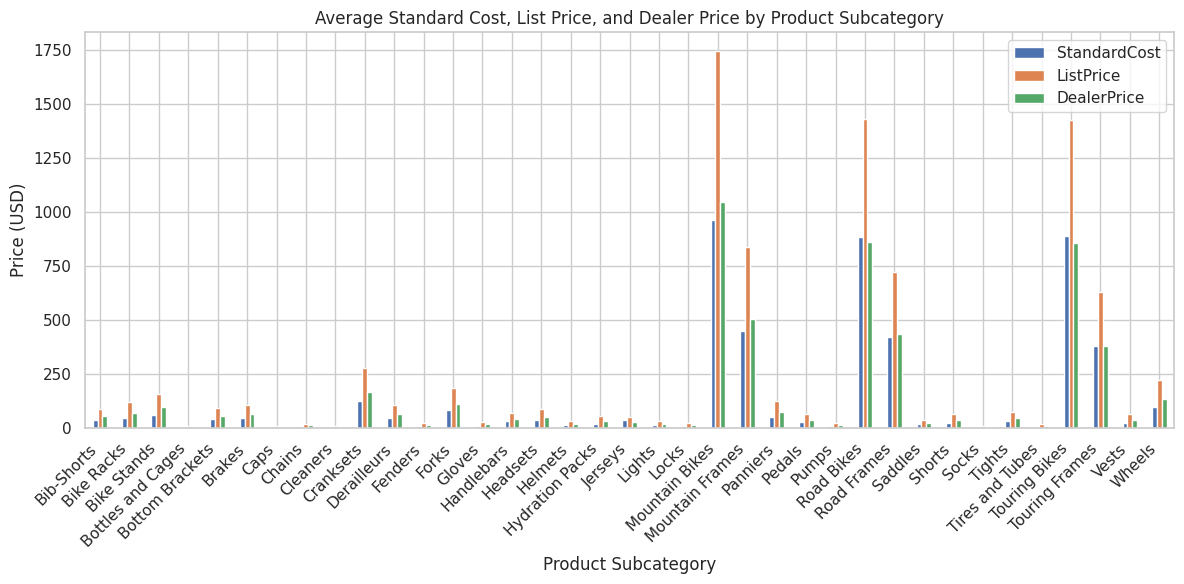

In [19]:
# -------------------------------
# Step 8: Visualizing the results
# -------------------------------

sns.set(style="whitegrid")
plt.rcParams.update({'figure.autolayout': True})  # auto layout fix

# 1. Average Standard Cost, List Price, and Dealer Price across different Product Subcategories.
price_df = df_no_duplicates.groupby('EnglishProductSubcategoryName')[['StandardCost', 'ListPrice', 'DealerPrice']].mean().reset_index()

price_df.plot(x='EnglishProductSubcategoryName', kind='bar', figsize=(12, 6))
plt.title('Average Standard Cost, List Price, and Dealer Price by Product Subcategory')
plt.xlabel('Product Subcategory')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 📊 Average Standard Cost, List Price, and Dealer Price by Product Subcategory

### 🧠 What this graph shows:

This grouped bar chart compares the **average Standard Cost**, **List Price**, and **Dealer Price** across different **Product Subcategories**.

- **X-axis:** Product Subcategories (e.g., Mountain Bikes, Road Frames, Helmets, Gloves, etc.)
- **Y-axis:** Price in USD
- **Bars color legend:**
  - 🟦 **Blue:** Average Standard Cost (Manufacturing Cost)
  - 🟧 **Orange:** Average List Price (Retail Price)
  - 🟩 **Green:** Average Dealer Price (Wholesale Price)

---

### 📌 Insights & Observations:

- **Highest Price Categories:**  
  The highest average prices are observed in **Mountain Bikes**, **Road Frames**, and **Touring Bikes**, often exceeding **$1000 USD**.

- **Typical Price Relationship:**  
  In most subcategories:  
  **List Price > Dealer Price > Standard Cost**,  
  which reflects a typical retail pricing model.

- **Profit Margin Insights:**  
  The largest price gaps (and likely the highest profit margins) appear in categories like **Mountain Bikes** and **Road Frames**.

- **Low-Cost Categories:**  
  Products like **Gloves**, **Socks**, and **Caps** show low price levels and smaller profit margins, which suggests high sales volume is needed to generate significant revenue.

- **Dealer Price Patterns:**  
  The difference between **Dealer Price** and **List Price** varies by category, which could indicate different discount strategies for dealers.

---

### 📌 Recommendations for Stakeholders:

- ✅ Focus sales and marketing efforts on **high-margin categories** (e.g., **Mountain Bikes**, **Road Frames**).
- ✅ Review pricing and promotional strategies for **low-margin categories** (e.g., **Gloves**, **Socks**).
- ✅ Analyze dealer discount policies in categories where **Dealer Price** is significantly lower than **List Price**.
- ✅ Use these insights to optimize production, pricing, and sales strategies.

---


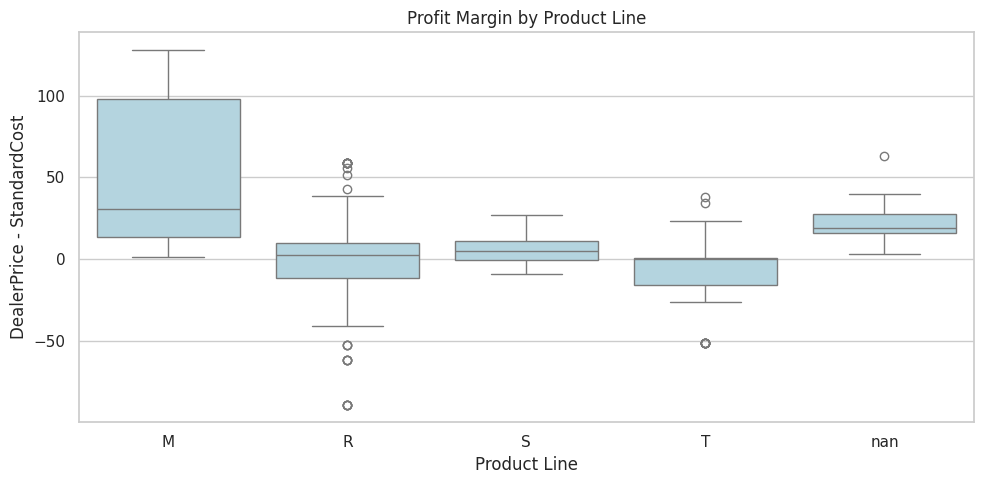

In [21]:

# 2. Boxplot: Profit Margin by Product Line
df_no_duplicates['ProfitMargin'] = df_no_duplicates['DealerPrice'] - df_no_duplicates['StandardCost']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no_duplicates, x='ProductLine', y='ProfitMargin', color='lightblue')
plt.title('Profit Margin by Product Line')
plt.xlabel('Product Line')
plt.ylabel('DealerPrice - StandardCost')
plt.tight_layout()
plt.show()


## 📈 Profit Margin by Product Line

### 🧠 What this graph shows:

This **box plot** displays the distribution of **profit margins** (calculated as `Dealer Price - Standard Cost`) across different **Product Lines**.

- **X-axis:** Product Line codes (`M`, `R`, `S`, `T`, and `NaN` for undefined/missing values)
- **Y-axis:** Profit Margin (USD difference between Dealer Price and Standard Cost)

---

### 📌 Insights & Observations:

- **Product Line M:**  
  Shows the **highest and widest spread of profit margins**, with median profit significantly above other lines.  
  This indicates a **more profitable product line**, but with higher variability.

- **Product Lines R, S, T:**  
  Have **lower and more concentrated margins**.  
  Especially Product Line `R`, which shows several **outliers on the negative side**, suggesting that some products may be sold below cost.

- **Outliers:**  
  There are several outliers (both positive and negative) across different product lines, indicating **unusual pricing** or **special cases**.

- **Missing Product Line (`NaN`):**  
  Products without a defined product line still show consistent positive margins but with fewer data points.

---

### 📌 Recommendations for Stakeholders:

- ✅ Investigate why **Product Line M** is significantly more profitable—possible focus for marketing or product expansion.
- ✅ Review **low-margin or negative-margin products** in **R**, **S**, and **T** lines to identify possible pricing issues.
- ✅ Address missing Product Line information (`NaN`) to improve data quality.
- ✅ Furth


Here is the analysis of the scatter plot titled "List Price vs Standard Cost by Product Line":


**🧠 What this graph shows:**
  - X-axis: Standard Cost (how much the product costs to produce)
  - Y-axis: List Price (how much the product is listed for sale)
  - Colors: Different ProductLine categories (M, R, S, T)
  - Each dot represents a product.


** 📊 Observations:**

1. Strong Positive Correlation
Across all product lines, as Standard Cost increases, List Price increases.
This shows consistent pricing strategy — higher-cost products are priced higher.

2. Product Line M (blue):
- Concentrated at mid-to-high cost range.
- Most dots lie above the line of equality, suggesting higher markups.
- Indicates premium pricing — M products are more expensive and possibly higher margin.

3. Product Line R (orange):
- Most frequent across the plot.
- Covers wide cost range — from very low-cost to high-cost products.
- Some high-cost products have relatively low markups, which may reduce profitability.


4. Product Line S (green):
- Very few data points (low representation).
- Lies in the low-cost, low-price region.
- Suggests these are budget/low-tier products with limited margin or volume-focused.

5. Product Line T (red):
- Also sparsely represented.
- Located in mid-cost range, but pricing is close to the standard cost.
- Suggests low profit margins, confirming the earlier boxplot insights.

**📌 Insights & Recommendations:**
- Line M follows a strong value-based pricing model — likely high-end.
- Line R is diverse, but worth reviewing high-cost, low-margin items.
- Lines S and T have fewer entries and possibly tighter margins — consider repositioning or bundling strategies.


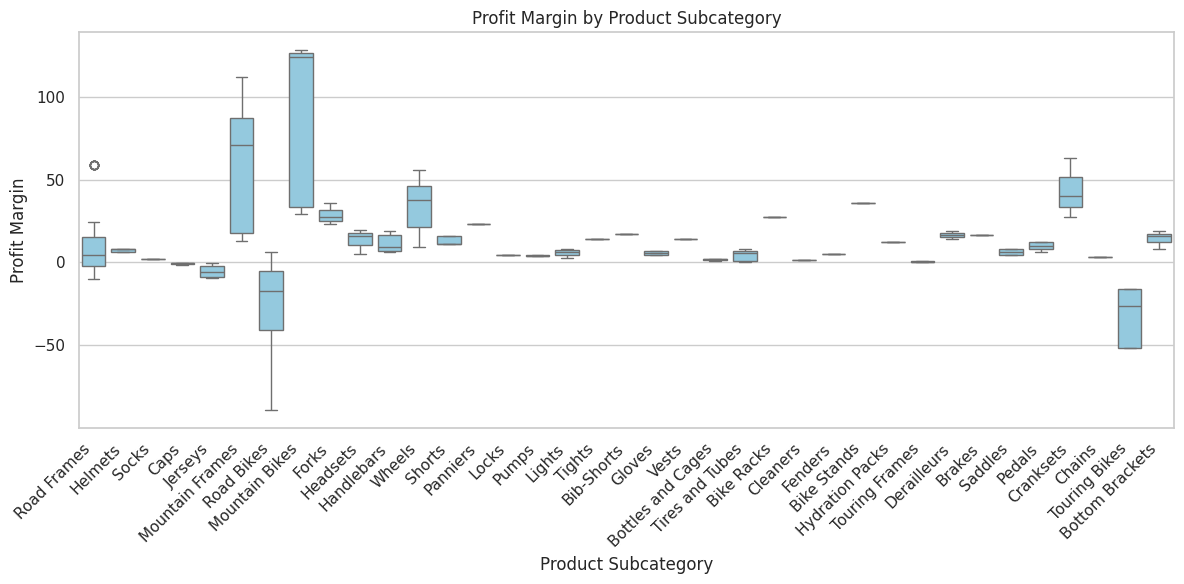

In [38]:
# 3. Boxplot: Profit Margin by Product Subcategory

plt.figure(figsize=(12, 6))
sns.boxplot(x='EnglishProductSubcategoryName', y='ProfitMargin', data=df_no_duplicates, color = 'skyblue')
plt.title('Profit Margin by Product Subcategory')
plt.xlabel('Product Subcategory')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-101-2520073007.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data = df_no_duplicates.pivot_table(index='Class', columns='Size', aggfunc='size', fill_value=0)


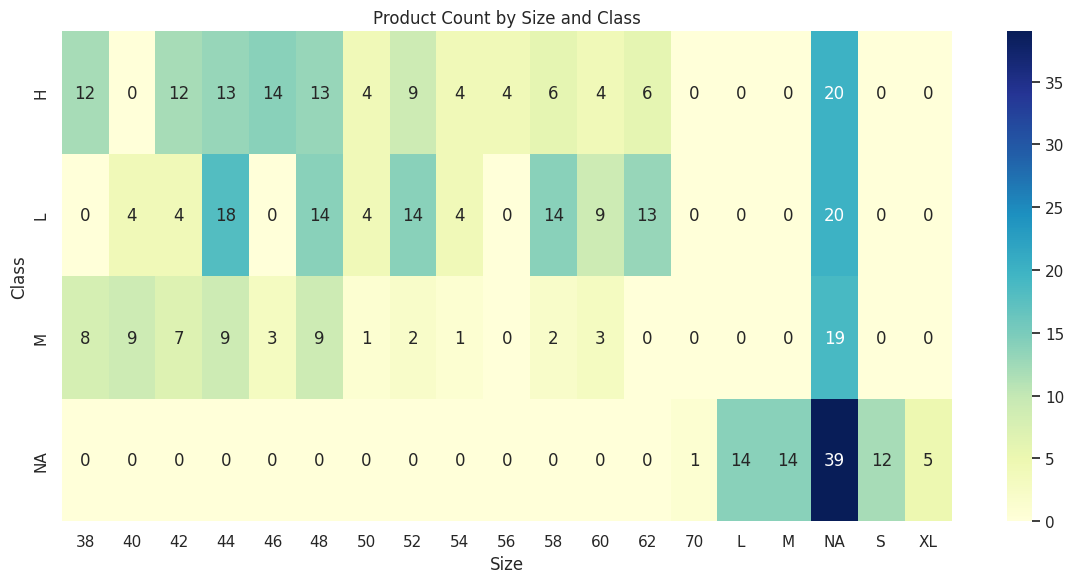

In [ ]:
# 4. Heatmap: Product count by Size and Class
heat_data = df_no_duplicates.pivot_table(index='Class', columns='Size', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Product Count by Size and Class')
plt.xlabel('Size')
plt.ylabel('Class')
plt.tight_layout()
plt.show()


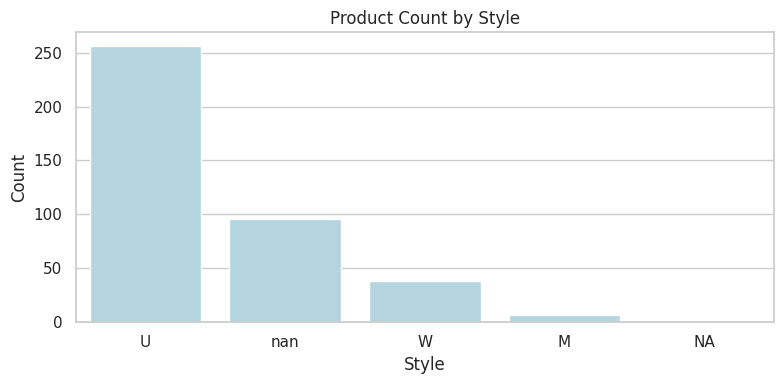

In [26]:
# 5. Countplot: Product count by Style
plt.figure(figsize=(8, 4))
sns.countplot(data=df_no_duplicates, x='Style', order=df_no_duplicates['Style'].value_counts().index, color='lightblue')
plt.title('Product Count by Style')
plt.xlabel('Style')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


/tmp/ipython-input-36-4101610982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no_duplicates, x='Color', palette='pastel', legend='False')


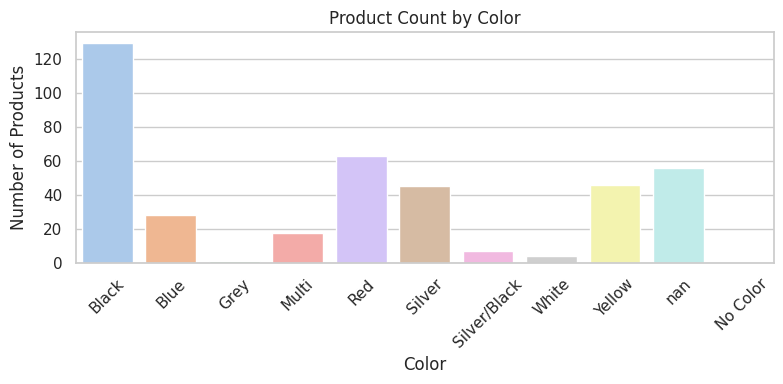

In [36]:
# 6. Countplot: Product Count by Color
plt.figure(figsize=(8, 4))
sns.countplot(data=df_no_duplicates, x='Color', palette='pastel', legend='False')
plt.title('Product Count by Color')
plt.xlabel('Color')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


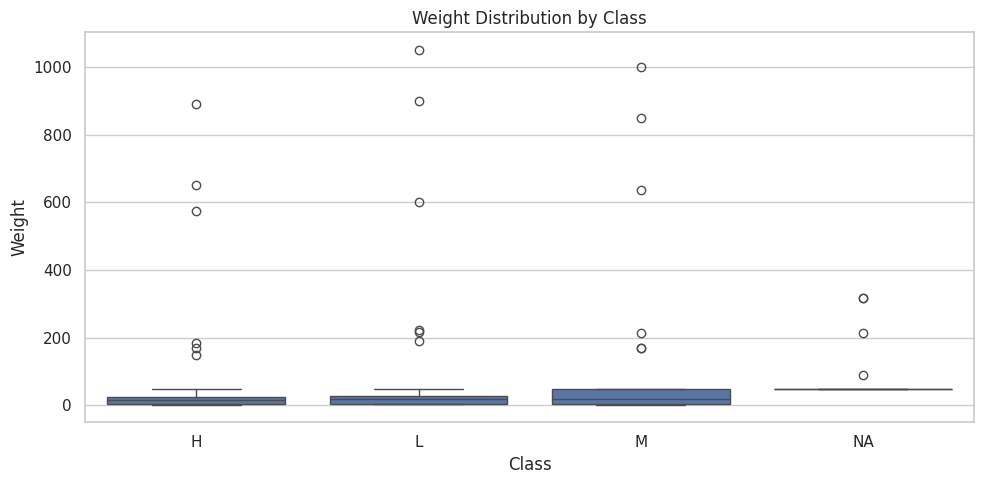

In [ ]:
# 7. Boxplot: Weight by Class
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no_duplicates, x='Class', y='Weight')
plt.title('Weight Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()


🧠 What this graph shows:
This boxplot visualizes the distribution of Profit Margin (%) across different Product Subcategories.

X-axis: Product Subcategories (e.g., Road Frames, Helmets, Mountain Bikes, Gloves, etc.)

Y-axis: Profit Margin (can be negative, zero, or positive)

Each box shows the spread of profit margins (interquartile range), median line, and outliers (dots).

📌 Insights & Observations:
High Profit Margin Categories:

Mountain Bikes, Forks, Headsets, and Cranksets have noticeably higher profit margins, with many products exceeding 50% margin.

These categories represent high-margin products and could be targeted for promotional or sales focus.

Negative Profit Margins:

Some subcategories like Touring Bikes, Caps, and Bottom Brackets show negative margins, indicating potential loss-making products or pricing issues.

Large Variability:

Categories like Mountain Bikes and Forks have a wide spread of margins, suggesting inconsistency in pricing or production costs within these subcategories.

Stable Low-Margin Categories:

Subcategories such as Locks, Gloves, and Lights have low but stable margins with small interquartile ranges.

📌 Recommendations:
✅ Focus on high-margin categories for marketing and sales campaigns (e.g., Mountain Bikes, Forks).
✅ Investigate negative margin subcategories (Touring Bikes, Caps) to understand if it's due to discounting, high production costs, or other factors.
✅ Review pricing strategy for categories with high variability in margins.
✅ Analyze low-margin but high-volume categories (like Gloves, Lights) for possible bundling or upsell opportunities.